In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00
time: 361 µs (started: 2024-06-28 04:37:10 +00:00)


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/flyai_datasets/main/auto-mpg.csv')
df.shape

(398, 9)

time: 59.1 ms (started: 2024-06-28 04:56:55 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
time: 15.4 ms (started: 2024-06-28 04:56:56 +00:00)


In [ ]:
df.columns = [col.replace(' ','_') for col in df.columns]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


time: 42.8 ms (started: 2024-06-28 04:56:56 +00:00)


In [ ]:
df['horsepower'].sort_values()

133    100
98     100
256    100
107    100
334    100
      ... 
126      ?
374      ?
354      ?
32       ?
336      ?
Name: horsepower, Length: 398, dtype: object

time: 6.18 ms (started: 2024-06-28 04:56:56 +00:00)


In [ ]:
df.loc[df['horsepower']=='?','horsepower'] = np.nan
df['horsepower'] = df['horsepower'].astype(float)

time: 2.66 ms (started: 2024-06-28 04:56:56 +00:00)


In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

time: 5.06 ms (started: 2024-06-28 04:56:57 +00:00)


In [ ]:
df.dropna(inplace=True,axis=0,subset=['horsepower'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
time: 11.1 ms (started: 2024-06-28 04:56:57 +00:00)


In [ ]:
df = df.drop(['origin','car_name'],axis=1)

time: 1.71 ms (started: 2024-06-28 04:56:59 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('mpg',axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time: 9.96 ms (started: 2024-06-28 04:58:17 +00:00)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 260 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     313 non-null    float64
 1   displacement  313 non-null    float64
 2   horsepower    313 non-null    float64
 3   weight        313 non-null    float64
 4   acceleration  313 non-null    float64
 5   model_year    313 non-null    float64
dtypes: float64(6)
memory usage: 17.1 KB
time: 16.2 ms (started: 2024-06-28 04:59:48 +00:00)


In [ ]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

time: 1.49 ms (started: 2024-06-28 04:58:19 +00:00)


In [ ]:
type(num_cols)

pandas.core.indexes.base.Index

time: 3.82 ms (started: 2024-06-28 04:58:19 +00:00)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


time: 33.5 ms (started: 2024-06-28 04:58:23 +00:00)


In [ ]:
X_train_n = X_train.to_numpy()
X_test_n = X_test.to_numpy()

y_train_n = y_train.to_numpy()
y_test_n = y_test.to_numpy()

time: 3.2 ms (started: 2024-06-28 05:22:54 +00:00)


In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=5,activation ='relu',input_shape=(6,)),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 35        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 207 ms (started: 2024-06-28 05:22:56 +00:00)


In [ ]:
model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics = ['mae','mse'],
)

history = model.fit(
    X_train_n,
    y_train_n,
    epochs = 100,
    validation_split = 0.2,
    batch_size = 16,
    verbose = 1
)

Epoch 1/100
16/16 [==============================] - 3s 29ms/step - loss: 56.7646 - mae: 5.8820 - mse: 56.7646 - val_loss: 63.0777 - val_mae: 6.0059 - val_mse: 63.0777
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 55.3111 - mae: 5.8334 - mse: 55.3111 - val_loss: 61.4791 - val_mae: 5.9350 - val_mse: 61.4791
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 53.9824 - mae: 5.7804 - mse: 53.9824 - val_loss: 60.1752 - val_mae: 5.8836 - val_mse: 60.1752
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 52.8170 - mae: 5.7350 - mse: 52.8170 - val_loss: 58.8435 - val_mae: 5.8283 - val_mse: 58.8435
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 51.6103 - mae: 5.6761 - mse: 51.6103 - val_loss: 57.6718 - val_mae: 5.7749 - val_mse: 57.6718
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 50.5731 - mae: 5.6283 - mse: 50.5731 - val_loss: 56.5244 - val_mae: 5.7267 - val_mse: 56.5

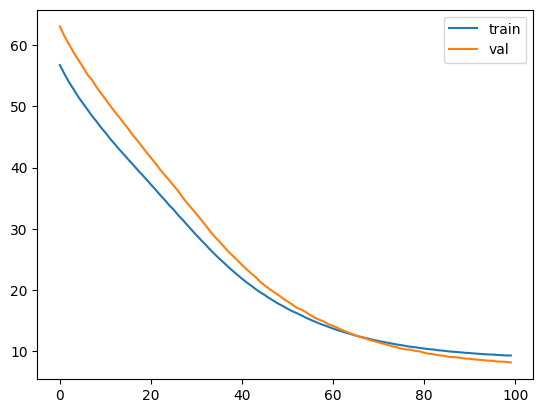

time: 776 ms (started: 2024-06-28 05:28:26 +00:00)


In [ ]:
hist = history.history
epochs = history.epoch

plt.plot(epochs,hist['loss'],label='train')
plt.plot(epochs,hist['val_loss'],label='val')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 9ms/step


array([[25.834923 ],
       [19.610779 ],
       [36.25013  ],
       [27.976719 ],
       [28.128187 ],
       [28.948483 ],
       [15.983661 ],
       [31.179325 ],
       [ 4.2273602],
       [35.231285 ],
       [16.698734 ],
       [ 8.057738 ],
       [10.201253 ],
       [27.215952 ],
       [ 5.7153783],
       [34.035038 ],
       [ 5.497229 ],
       [34.092842 ],
       [26.59547  ],
       [27.530743 ],
       [ 6.969363 ],
       [47.420475 ],
       [37.645935 ],
       [11.889745 ],
       [29.111757 ],
       [21.209106 ],
       [18.402733 ],
       [ 6.4021044],
       [34.46573  ],
       [21.281713 ],
       [11.760195 ],
       [ 7.897026 ],
       [ 6.7730136],
       [33.16143  ],
       [14.073309 ],
       [39.238976 ],
       [10.979019 ],
       [23.475645 ],
       [11.420226 ],
       [16.865711 ],
       [11.317526 ],
       [26.305084 ],
       [36.46932  ],
       [23.513702 ],
       [12.240607 ],
       [17.73785  ],
       [ 6.5631943],
       [33.02

time: 671 ms (started: 2024-06-28 05:25:57 +00:00)


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_n)
mean_squared_error(y_test_n,y_pred)

3/3 [==============================] - 0s 4ms/step


7.989481172964943

time: 206 ms (started: 2024-06-28 05:29:03 +00:00)


Text(0, 0.5, 'y_pred')

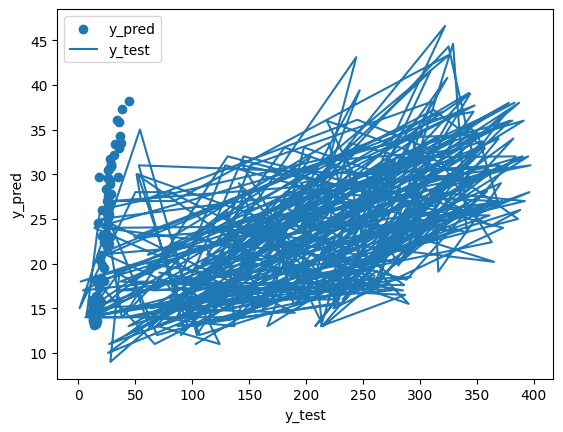

time: 350 ms (started: 2024-06-28 05:31:24 +00:00)


In [ ]:
plt.scatter(y_test_n,y_pred)
plt.plot(y_train)
plt.legend(['y_pred','y_test'])
plt.xlabel('y_test')
plt.ylabel('y_pred')